In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [4]:
data_set_contaminantes = pd.read_csv('../../../data/processed/normalizados/Dataset_MinMax.csv',sep=';',decimal=',')
data_set_contaminantes= data_set_contaminantes.drop(['mes','dia','fecha'],axis=1)
data_set_contaminantes

,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,calidad_aire,year,mes_sin,mes_cos,dia_sin,dia_cos
0,0.0282,0.0594,0.2366,0.6306,0.8301,0.1680,0.0000,0.0965,Bueno,0.0,0.5,0.866,0.2013,0.9795
1,0.0431,0.0929,0.2153,0.7204,0.8548,0.1680,0.0000,0.1404,Moderado,0.0,0.5,0.866,0.3944,0.9190
2,0.0379,0.0717,0.4858,0.7776,0.7089,0.1195,0.0000,0.1316,Moderado,0.0,0.5,0.866,0.5713,0.8208
3,0.0394,0.0839,0.5667,0.7837,0.6561,0.1195,0.0000,0.1345,Moderado,0.0,0.5,0.866,0.7248,0.6890
4,0.0258,0.0628,0.3569,0.7302,0.7754,0.1755,0.0000,0.0877,Bueno,0.0,0.5,0.866,0.8486,0.5290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.0592,0.1281,0.3616,0.4112,0.5345,0.1650,0.0000,0.1696,Moderado,1.0,1.0,0.000,-0.7248,0.6890
3736,0.0162,0.0525,0.6990,0.5617,0.4218,0.1979,0.0011,0.0526,Bueno,1.0,1.0,0.000,-0.5713,0.8208
3737,0.0147,0.0478,0.4931,0.4281,0.4593,0.3207,0.0000,0.0468,Bueno,1.0,1.0,0.000,-0.3944,0.9190
3738,0.0314,0.0802,0.3777,0.3048,0.4338,0.4077,0.0000,0.1082,Bueno,1.0,1.0,0.000,-0.2013,0.9795


<Axes: xlabel='calidad_aire', ylabel='count'>

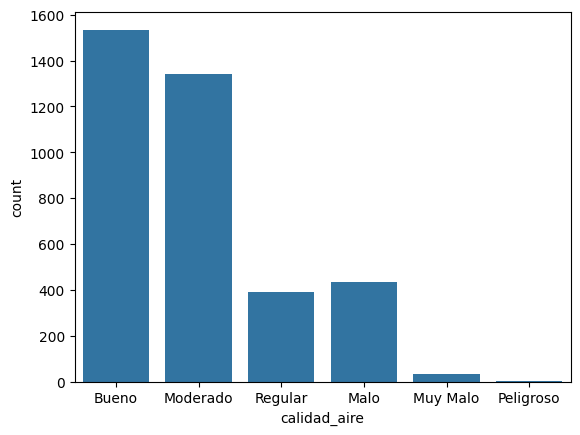

In [5]:

sns.color_palette()
sns.countplot(x= data_set_contaminantes["calidad_aire"])

In [6]:
data_set_contaminantes['calidad_aire_shifted'] = data_set_contaminantes['calidad_aire'].shift(-1)

def asignar_calidad(row):
    if row['calidad_aire_shifted'] == 'Bueno':
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirTomorrow'] = data_set_contaminantes.apply(lambda row: asignar_calidad(row), axis=1)

data_set_contaminantes = data_set_contaminantes.drop('calidad_aire_shifted', axis=1)

def asignar_calidad_hoy(row):
    if row['calidad_aire'] == 'Bueno': 
        return 'yes'
    else:
        return 'no'

data_set_contaminantes['goodAirToday'] = data_set_contaminantes.apply(lambda row: asignar_calidad_hoy(row), axis=1)



data_set_contaminantes

,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,calidad_aire,year,mes_sin,mes_cos,dia_sin,dia_cos,goodAirTomorrow,goodAirToday
0,0.0282,0.0594,0.2366,0.6306,0.8301,0.1680,0.0000,0.0965,Bueno,0.0,0.5,0.866,0.2013,0.9795,no,yes
1,0.0431,0.0929,0.2153,0.7204,0.8548,0.1680,0.0000,0.1404,Moderado,0.0,0.5,0.866,0.3944,0.9190,no,no
2,0.0379,0.0717,0.4858,0.7776,0.7089,0.1195,0.0000,0.1316,Moderado,0.0,0.5,0.866,0.5713,0.8208,no,no
3,0.0394,0.0839,0.5667,0.7837,0.6561,0.1195,0.0000,0.1345,Moderado,0.0,0.5,0.866,0.7248,0.6890,yes,no
4,0.0258,0.0628,0.3569,0.7302,0.7754,0.1755,0.0000,0.0877,Bueno,0.0,0.5,0.866,0.8486,0.5290,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.0592,0.1281,0.3616,0.4112,0.5345,0.1650,0.0000,0.1696,Moderado,1.0,1.0,0.000,-0.7248,0.6890,yes,no
3736,0.0162,0.0525,0.6990,0.5617,0.4218,0.1979,0.0011,0.0526,Bueno,1.0,1.0,0.000,-0.5713,0.8208,yes,yes
3737,0.0147,0.0478,0.4931,0.4281,0.4593,0.3207,0.0000,0.0468,Bueno,1.0,1.0,0.000,-0.3944,0.9190,yes,yes
3738,0.0314,0.0802,0.3777,0.3048,0.4338,0.4077,0.0000,0.1082,Bueno,1.0,1.0,0.000,-0.2013,0.9795,no,yes


<Axes: xlabel='goodAirTomorrow', ylabel='count'>

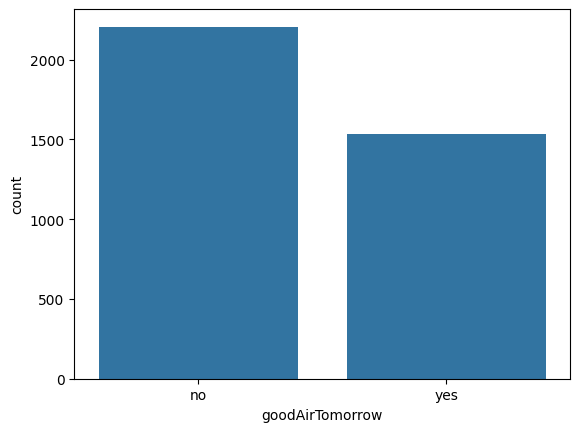

In [7]:
sns.color_palette()
sns.countplot(x= data_set_contaminantes["goodAirTomorrow"])

In [8]:
data_set_contaminantes['goodAirToday'] = data_set_contaminantes['goodAirToday'].map({'yes': 1, 'no': 0})
data_set_contaminantes['goodAirTomorrow'] = data_set_contaminantes['goodAirTomorrow'].map({'yes': 1, 'no': 0})
data_set_contaminantes

,pm2.5,pm10,humedad,puntoRocio,temperatura,viento,precipitacion,AQI,calidad_aire,year,mes_sin,mes_cos,dia_sin,dia_cos,goodAirTomorrow,goodAirToday
0,0.0282,0.0594,0.2366,0.6306,0.8301,0.1680,0.0000,0.0965,Bueno,0.0,0.5,0.866,0.2013,0.9795,0,1
1,0.0431,0.0929,0.2153,0.7204,0.8548,0.1680,0.0000,0.1404,Moderado,0.0,0.5,0.866,0.3944,0.9190,0,0
2,0.0379,0.0717,0.4858,0.7776,0.7089,0.1195,0.0000,0.1316,Moderado,0.0,0.5,0.866,0.5713,0.8208,0,0
3,0.0394,0.0839,0.5667,0.7837,0.6561,0.1195,0.0000,0.1345,Moderado,0.0,0.5,0.866,0.7248,0.6890,1,0
4,0.0258,0.0628,0.3569,0.7302,0.7754,0.1755,0.0000,0.0877,Bueno,0.0,0.5,0.866,0.8486,0.5290,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.0592,0.1281,0.3616,0.4112,0.5345,0.1650,0.0000,0.1696,Moderado,1.0,1.0,0.000,-0.7248,0.6890,1,0
3736,0.0162,0.0525,0.6990,0.5617,0.4218,0.1979,0.0011,0.0526,Bueno,1.0,1.0,0.000,-0.5713,0.8208,1,1
3737,0.0147,0.0478,0.4931,0.4281,0.4593,0.3207,0.0000,0.0468,Bueno,1.0,1.0,0.000,-0.3944,0.9190,1,1
3738,0.0314,0.0802,0.3777,0.3048,0.4338,0.4077,0.0000,0.1082,Bueno,1.0,1.0,0.000,-0.2013,0.9795,0,1


In [9]:
X = data_set_contaminantes.drop(["goodAirTomorrow","calidad_aire"], axis=1)
y = data_set_contaminantes["goodAirTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(3740, 14)

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # cantidad mínima de cambio para contar como una mejora
    patience=20, # cuántas épocas esperar antes de detener
    restore_best_weights=True,
)
 
model = Sequential()


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
# model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2, verbose=0)

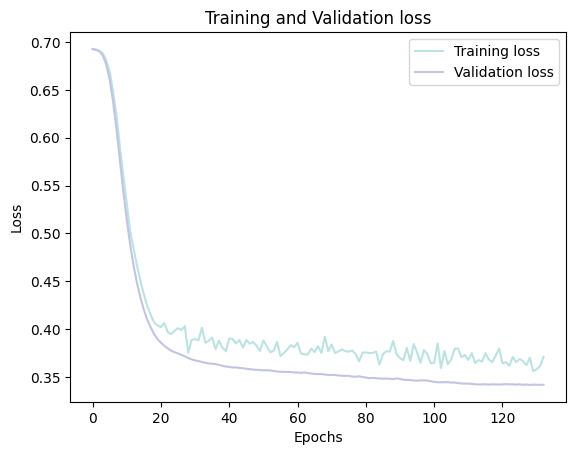

In [11]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

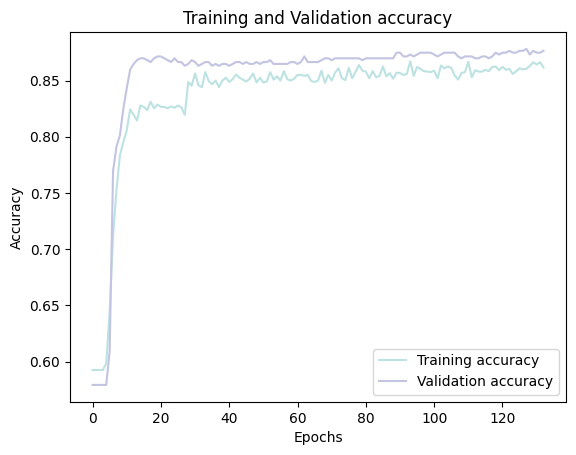

In [12]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

24/24 [==============================] - 0s 838us/step


<Axes: >

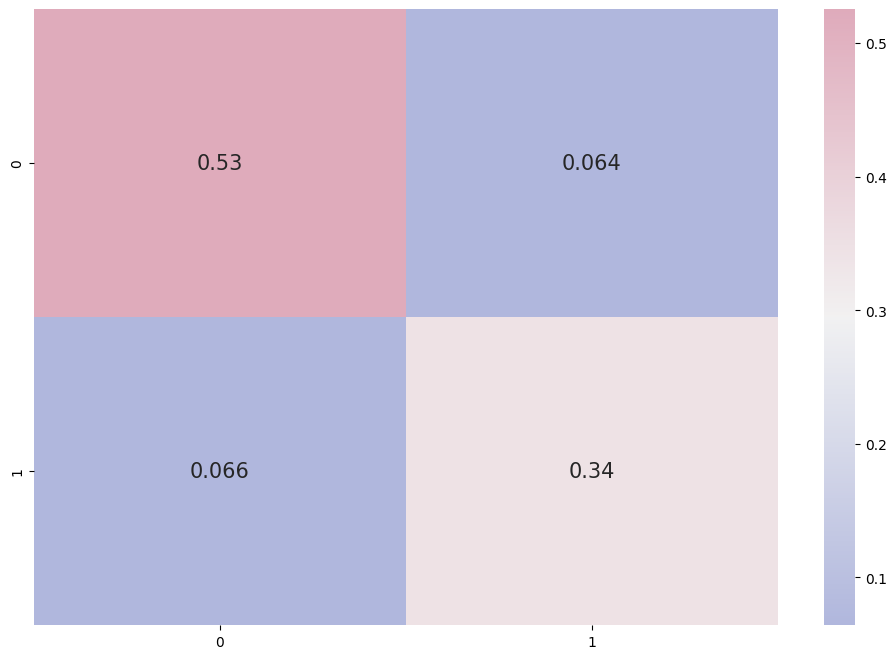

In [14]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [15]:
print(cf_matrix)

[[393  48]
 [ 49 258]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       441
           1       0.84      0.84      0.84       307

    accuracy                           0.87       748
   macro avg       0.87      0.87      0.87       748
weighted avg       0.87      0.87      0.87       748

